In [2]:
import pandas as pd
# calendar = pd.read_csv('calendar.csv.gz')
# listings = pd.read_csv('listings.csv')
listings2 = pd.read_csv('listings.csv.gz', low_memory=False)
# neighborhoods = pd.read_csv('neighbourhoods.csv')
# neighborhoods_geojson = pd.read_csv('neighbourhoods.geojson')
# reviews = pd.read_csv('reviews.csv')
# reviews2 = pd.read_csv('reviews.csv.gz')


In [133]:
listings2.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [10]:
len(listings2['neighbourhood_group_cleansed'].unique())

5

In [11]:
listings_short = listings2.filter(['price','accommodates','neighbourhood','neighbourhood_group_cleansed','zipcode','review_scores_rating', 'room_type','number_of_reviews' ], axis=1)

In [12]:
listings_short.head(10)

,price,accommodates,neighbourhood,neighbourhood_group_cleansed,zipcode,review_scores_rating,room_type,number_of_reviews
0,$59.00,2,NaN,Brooklyn,11221,73.0,Private room,14
1,$59.00,3,Harlem,Manhattan,10026,93.0,Private room,174
2,$149.00,4,Kensington,Brooklyn,11218,98.0,Private room,9
3,$225.00,2,Midtown,Manhattan,10018,95.0,Entire home/apt,38
4,$89.00,4,Red Hook,Brooklyn,11231,79.0,Private room,22
5,$70.00,2,Williamsburg,Brooklyn,11206,98.0,Private room,36
6,$200.00,8,Prospect Heights,Brooklyn,11238,99.0,Entire home/apt,140
7,$150.00,2,Harlem,Manhattan,10027,NaN,Private room,0
8,$89.00,3,Clinton Hill,Brooklyn,11238,91.0,Entire home/apt,217
9,$55.00,2,Clinton Hill,Brooklyn,11205,92.0,Private room,27


In [13]:
import requests

r = requests.get("http://www.zillow.com/webservice/GetRegionChildren.htm?zws-id=X1-ZWz188d4jlv3m3_9k5bc&state=ny&city=new_york&childtype=zipcode")
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.content)
zip_zindex = soup.findAll(['name', 'zindex'])
zipcode_list = soup.findAll('name')
median_prices_list = soup.findAll('zindex')


In [14]:
zipcodes={}
for element in zip_zindex:
    if element in zipcode_list:
        zipcodes[element.contents[0]]={'zipcode':element.contents}
        lastzip = element.contents
    if element in median_prices_list:
        zipcodes[lastzip[0]]={'med_zillow_price': element.contents[0]}


In [15]:
zipcodes

{'10025': {'med_zillow_price': '1034300'},
 '10023': {'zipcode': ['10023']},
 '10002': {'med_zillow_price': '877400'},
 '10467': {'med_zillow_price': '310500'},
 '11226': {'med_zillow_price': '633400'},
 '10016': {'zipcode': ['10016']},
 '11375': {'med_zillow_price': '770800'},
 '11235': {'med_zillow_price': '578700'},
 '10029': {'med_zillow_price': '719400'},
 '10009': {'med_zillow_price': '1051700'},
 '10011': {'zipcode': ['10011']},
 '10128': {'zipcode': ['10128']},
 '11201': {'med_zillow_price': '986200'},
 '10462': {'med_zillow_price': '104300'},
 '10456': {'med_zillow_price': '254600'},
 '11206': {'zipcode': ['11206']},
 '10003': {'med_zillow_price': '1410600'},
 '10463': {'med_zillow_price': '509700'},
 '11212': {'med_zillow_price': '312000'},
 '11230': {'med_zillow_price': '839000'},
 '11209': {'med_zillow_price': '825900'},
 '10024': {'zipcode': ['10024']},
 '11221': {'med_zillow_price': '728600'},
 '11214': {'med_zillow_price': '588100'},
 '10019': {'zipcode': ['10019']},
 '1

In [16]:
import pandas as pd
df = pd.DataFrame(zipcodes)
data = df.T
data["zip"]=data.index
data2 = data.drop(columns = 'zipcode')
# zillow_median['zipcode']=zillow_median['zip']
# zillow_median['median_zillow_homeprice'] = zillow_median['price']

In [17]:
data2.head(100)

,med_zillow_price,zip
10025,1034300,10025
10023,NaN,10023
10002,877400,10002
10467,310500,10467
11226,633400,11226
10016,NaN,10016
11375,770800,11375
11235,578700,11235
10029,719400,10029
10009,1051700,10009


In [18]:
full_data = data2.set_index('zip').join(listings_short.set_index('zipcode'))

In [19]:
full_data

,med_zillow_price,price,accommodates,neighbourhood,neighbourhood_group_cleansed,review_scores_rating,room_type,number_of_reviews
10001,2188500,$150.00,4.0,Chelsea,Manhattan,89.0,Entire home/apt,394.0
10001,2188500,$123.00,2.0,Chelsea,Manhattan,92.0,Private room,356.0
10001,2188500,$130.00,2.0,Chelsea,Manhattan,96.0,Entire home/apt,19.0
10001,2188500,$239.00,2.0,NaN,Manhattan,99.0,Entire home/apt,26.0
10001,2188500,$400.00,3.0,NaN,Manhattan,96.0,Entire home/apt,26.0
10001,2188500,$250.00,2.0,Chelsea,Manhattan,96.0,Entire home/apt,18.0
10001,2188500,$226.00,2.0,Chelsea,Manhattan,90.0,Entire home/apt,26.0
10001,2188500,$225.00,4.0,Chelsea,Manhattan,95.0,Entire home/apt,53.0
10001,2188500,$310.00,4.0,Chelsea,Manhattan,93.0,Entire home/apt,266.0
10001,2188500,$135.00,3.0,Flatiron District,Manhattan,93.0,Private room,199.0


In [20]:
import seaborn as sns
removed_null = full_data.dropna()
removed_null.dtypes

med_zillow_price                 object
price                            object
accommodates                    float64
neighbourhood                    object
neighbourhood_group_cleansed     object
review_scores_rating            float64
room_type                        object
number_of_reviews               float64
dtype: object

In [21]:
cols = ['med_zillow_price', 'price']
removed_null[cols] = removed_null[cols].apply(pd.to_numeric, errors='coerce', axis=1)
removed_null.dtypes

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


med_zillow_price                float64
price                           float64
accommodates                    float64
neighbourhood                    object
neighbourhood_group_cleansed     object
review_scores_rating            float64
room_type                        object
number_of_reviews               float64
dtype: object

In [22]:
full_data.corr()

,accommodates,review_scores_rating,number_of_reviews
accommodates,1.000000,-0.015865,0.106964
review_scores_rating,-0.015865,1.000000,0.016059
number_of_reviews,0.106964,0.016059,1.000000


In [23]:
airbnb = full_data.dropna()
airbnb.head()

,med_zillow_price,price,accommodates,neighbourhood,neighbourhood_group_cleansed,review_scores_rating,room_type,number_of_reviews
10001,2188500,$150.00,4.0,Chelsea,Manhattan,89.0,Entire home/apt,394.0
10001,2188500,$123.00,2.0,Chelsea,Manhattan,92.0,Private room,356.0
10001,2188500,$130.00,2.0,Chelsea,Manhattan,96.0,Entire home/apt,19.0
10001,2188500,$250.00,2.0,Chelsea,Manhattan,96.0,Entire home/apt,18.0
10001,2188500,$226.00,2.0,Chelsea,Manhattan,90.0,Entire home/apt,26.0


In [179]:
def remove_apostrophe(dataframe):
    dataframe.columns = [x.replace("'","") for x in dataframe.columns]
    
def remove_period(dataframe):
    dataframe.columns = [x.replace(".","") for x in dataframe.columns]
    
def remove_dash(dataframe):
    dataframe.columns = [x.replace("-","") for x in dataframe.columns]
    
def remove_slash(dataframe):
    dataframe.columns = [x.replace("/","") for x in dataframe.columns]
    
remove_apostrophe(airbnb)
remove_period(airbnb)
remove_dash(airbnb)
remove_slash(airbnb)
remove_the_spaces(airbnb)

In [180]:
airbnb['price'] = airbnb.price.replace('[\$,]', '', regex=True).astype(float)
airbnb['med_zillow_price'] = airbnb.med_zillow_price.apply(pd.to_numeric, errors='coerce')
airbnb['borough'] = airbnb['neighbourhood_group_cleansed']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [181]:
airbnb.head()

,med_zillow_price,price,accommodates,neighbourhood,neighbourhood_group_cleansed,review_scores_rating,room_type,number_of_reviews,borough
10001,2188500,150.0,4.0,Chelsea,Manhattan,89.0,Entire home/apt,394.0,Manhattan
10001,2188500,123.0,2.0,Chelsea,Manhattan,92.0,Private room,356.0,Manhattan
10001,2188500,130.0,2.0,Chelsea,Manhattan,96.0,Entire home/apt,19.0,Manhattan
10001,2188500,250.0,2.0,Chelsea,Manhattan,96.0,Entire home/apt,18.0,Manhattan
10001,2188500,226.0,2.0,Chelsea,Manhattan,90.0,Entire home/apt,26.0,Manhattan


In [173]:
airbnb.corr()

,med_zillow_price,price,accommodates,review_scores_rating,number_of_reviews
med_zillow_price,1.000000,0.162101,0.037396,-0.003153,-0.015086
price,0.162101,1.000000,0.331392,0.033797,-0.015055
accommodates,0.037396,0.331392,1.000000,-0.004998,0.101848
review_scores_rating,-0.003153,0.033797,-0.004998,1.000000,0.017148
number_of_reviews,-0.015086,-0.015055,0.101848,0.017148,1.000000


In [111]:
abs(airbnb.corr())>0.75

,med_zillow_price,price,accommodates,review_scores_rating,number_of_reviews
med_zillow_price,True,False,False,False,False
price,False,True,False,False,False
accommodates,False,False,True,False,False
review_scores_rating,False,False,False,True,False
number_of_reviews,False,False,False,False,True


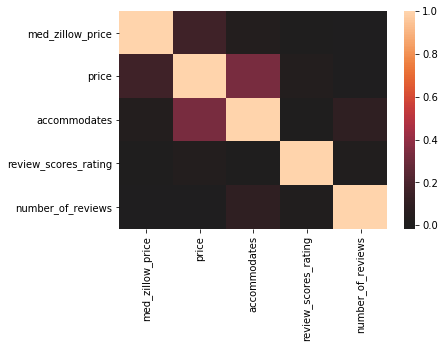

In [112]:
sns.heatmap(airbnb.corr(), center=0);

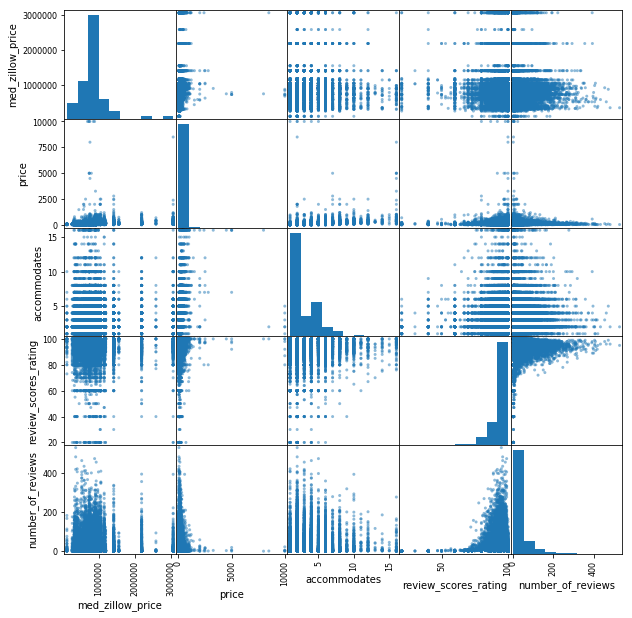

In [113]:
pd.plotting.scatter_matrix(airbnb,figsize  = [10, 10]);

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [182]:
formula = "price ~ med_zillow_price+accommodates+review_scores_rating+number_of_reviews"
model = ols(formula= formula, data=airbnb).fit()

In [183]:
formula

'price ~ med_zillow_price+accommodates+review_scores_rating+number_of_reviews'

In [184]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     934.3
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:16:37   Log-Likelihood:            -1.6070e+05
No. Observations:               23799   AIC:                         3.214e+05
Df Residuals:                   23794   BIC:                         3.214e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -135.0716     15.891     -8.500      0.000    -166.218    -103.925
med_zillow_price      8.296e-05   3.36e-06     24.723      0.000    7.64e-05    8.95e-05
accommodates            38.1755      0.700     54.559      0.000      36.804      39.547
review_scores_rating     1.0012      0.164      6.093      0.000       0.679       1.323
number_of_reviews       -0.2301      0.030     -7.776      0.000      -0.288      -0.172
==============================================================================
Omnibus:                    65190.613   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2286973653.018
Skew:                          34.566   Prob(JB):                         0.00
Kurtosis:                    1520.073   Cond. No.                     1.11e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [185]:
neighborhoods = pd.get_dummies(airbnb["neighbourhood"], prefix="hood", drop_first = True)
boroughs = pd.get_dummies(airbnb['borough'], prefix = "borough", drop_first = True)
price = airbnb['price']
med_zillow_price = airbnb['med_zillow_price']
accommodates = airbnb['accommodates']
review_scores_rating = airbnb['review_scores_rating']
number_of_reviews = airbnb['number_of_reviews']
data_fin = pd.concat([neighborhoods, boroughs, price, med_zillow_price, accommodates, review_scores_rating, number_of_reviews], axis=1)

In [186]:
def remove_apostrophe(dataframe):
    dataframe.columns = [x.replace("'","") for x in dataframe.columns]
    
def remove_period(dataframe):
    dataframe.columns = [x.replace(".","") for x in dataframe.columns]
    
def remove_dash(dataframe):
    dataframe.columns = [x.replace("-","") for x in dataframe.columns]
    
def remove_slash(dataframe):
    dataframe.columns = [x.replace("/","") for x in dataframe.columns]
    
remove_apostrophe(data_fin)
remove_period(data_fin)
remove_dash(data_fin)
remove_slash(data_fin)
remove_the_spaces(data_fin)

In [176]:
data_fin.head()

,hood_Alphabet City,hood_Annadale,hood_Astoria,hood_Bath Beach,hood_Battery Park City,hood_Bay Ridge,hood_Bay Terrace,hood_Baychester,hood_Bayside,hood_Bedford-Stuyvesant,...,hood_Woodside,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island,price,med_zillow_price,accommodates,review_scores_rating,number_of_reviews
10001,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,150.0,2188500,4.0,89.0,394.0
10001,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,123.0,2188500,2.0,92.0,356.0
10001,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,130.0,2188500,2.0,96.0,19.0
10001,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,250.0,2188500,2.0,96.0,18.0
10001,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,226.0,2188500,2.0,90.0,26.0


In [187]:
outcome = 'price'
predictors = data_fin.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + " ~ " + pred_sum

In [188]:
formula

'price ~ hood_Alphabet_City+hood_Annadale+hood_Astoria+hood_Bath_Beach+hood_Battery_Park_City+hood_Bay_Ridge+hood_Bay_Terrace+hood_Baychester+hood_Bayside+hood_BedfordStuyvesant+hood_Bensonhurst+hood_Bergen_Beach+hood_Boerum_Hill+hood_Borough_Park+hood_Brighton_Beach+hood_Bronxdale+hood_Brooklyn+hood_Brooklyn_Heights+hood_Brooklyn_Navy_Yard+hood_Brownsville+hood_Bulls_Head+hood_Bushwick+hood_Canarsie+hood_Carroll_Gardens+hood_Castle_Hill_+hood_Castleton_Corners+hood_Chelsea+hood_Chinatown+hood_City_Island+hood_Civic_Center+hood_Claremont+hood_Clifton+hood_Clinton_Hill+hood_Cobble_Hill+hood_College_Point+hood_Columbia_Street_Waterfront+hood_Concord+hood_Concourse+hood_Coney_Island+hood_Corona+hood_Country_Club+hood_Crotona+hood_Crown_Heights+hood_DUMBO+hood_Ditmars__Steinway+hood_Dongan_Hills+hood_Downtown_Brooklyn+hood_Dyker_Heights+hood_East_Elmhurst+hood_East_Flatbush+hood_East_Harlem+hood_East_New_York+hood_East_Village+hood_Edenwald+hood_Elm_Park+hood_Elmhurst+hood_Eltingville+hood

In [189]:
model2 = ols(formula = formula, data=data_fin).fit()

In [190]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     22.47
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:17:47   Log-Likelihood:            -1.6047e+05
No. Observations:               23799   AIC:                         3.213e+05
Df Residuals:                   23609   BIC:                         3.228e+05
Df Model:                         189                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          -120.5030     55.489     -2.172      0.030    -229.266     -11.740
hood_Alphabet_City                  -25.2013     15.744     -1.601      0.109     -56.061       5.659
hood_Annadale                       -44.7831    170.008     -0.263      0.792    -378.010     288.444
hood_Astoria                         35.4396     58.335      0.608      0.544     -78.900     149.779
hood_Bath_Beach                       0.1207     90.513      0.001      0.999    -177.291     177.532
hood_Battery_Park_City                3.5691     44.887      0.080      0.937     -84.412      91.550
hood_Bay_Ridge                        2.7240     77.567      0.035      0.972    -149.312     154.760
hood_Bay_Terrace                    -18.0375    223.065     -0.081      0.936    -455.260     419.185
hood_Baychester                     -19.8516     61.950     -0.320      0.749    -141.277     101.574
hood_Bayside                         -1.8170     66.934     -0.027      0.978    -133.013     129.379
hood_BedfordStuyvesant               19.5981     75.924      0.258      0.796    -129.217     168.414
hood_Bensonhurst                    -11.2637     81.898     -0.138      0.891    -171.789     149.262
hood_Bergen_Beach                   -21.3193    118.660     -0.180      0.857    -253.901     211.262
hood_Boerum_Hill                     54.8292     77.171      0.710      0.477     -96.430     206.089
hood_Borough_Park                   -13.0884     88.454     -0.148      0.882    -186.464     160.288
hood_Brighton_Beach                  -8.0283     82.037     -0.098      0.922    -168.826     152.769
hood_Bronxdale                       10.5364     74.044      0.142      0.887    -134.595     155.668
hood_Brooklyn                        41.7742     93.387      0.447      0.655    -141.270     224.819
hood_Brooklyn_Heights                83.1377     78.225      1.063      0.288     -70.189     236.465
hood_Brooklyn_Navy_Yard              28.0332     83.471      0.336      0.737    -135.576     191.643
hood_Brownsville                    -13.9140     83.705     -0.166      0.868    -177.981     150.153
hood_Bulls_Head                    -130.0390    170.011     -0.765      0.444    -463.271     203.193
hood_Bushwick                        -0.5132     76.052     -0.007      0.995    -149.580     148.553
hood_Canarsie                       -16.0655     78.392     -0.205      0.838    -169.719     137.588
hood_Carroll_Gardens                 62.4822     77.258      0.809      0.419     -88.948     213.912
hood_Castle_Hill_                    77.3784    115.894      0.668      0.504    -149.782     304.539
hood_Castleton_Corners              -27.0673    223.102     -0.121      0.903    -464.362     410.228
hood_Chelsea           

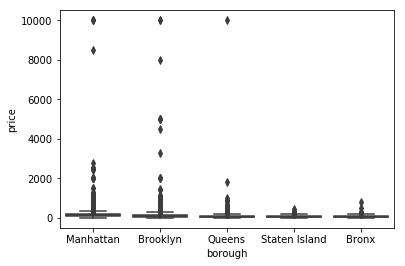

In [191]:
sns.boxplot(x=airbnb['borough'] , y=airbnb['price'], data = airbnb)

In [ ]:
airbnb['borough'].hist()